In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
#plt.rcParams['figure.figsize'] = [10, 5]



## Residual Gas Analysis

In [4]:
data_air = np.loadtxt("air.csv",delimiter=",", skiprows = 1)
#back = np.loadtxt("back.csv",delimiter = ",",skiprows = 1)
#print(len(back))

amu = data_air[:,0]
air1 = data_air[:,1]
air2 = data_air[:,2]
air3 = data_air[:,3]

mean_air = np.empty(len(amu))

for i in range(len(amu)):
    mean_air[i] = np.average(data_air[i,1:])

#err = np.sqrt(np.sum(np.square(average)) - np.square(np.sum(average)))/np.sqrt(641)
err = np.sqrt(np.abs(np.sum(np.square(mean_air)) - np.sum(mean_air)**2) )/641

errpos = np.empty(len(amu))
errneg = np.empty(len(amu))

for i in range(len(amu)):
    errpos[i] = mean_air[i] + err
    errneg[i] = mean_air[i] - err
#print(err)

#print(len(amu),len(air1),len(air2),len(air3))


#print(len(average))

#for i in range(len(amu)):
#    average[i] = air1[i],air2[i],air3[i]/3

lnpres = np.log(np.abs(mean_air))
errln = np.sqrt(np.abs(np.sum(np.square(lnpres)) - np.sum(lnpres)**2) )/641

errposln = np.empty(len(amu))
errnegln = np.empty(len(amu))

for i in range(len(amu)):
    errposln[i] = lnpres[i] + errln
    errnegln[i] = lnpres[i] - errln


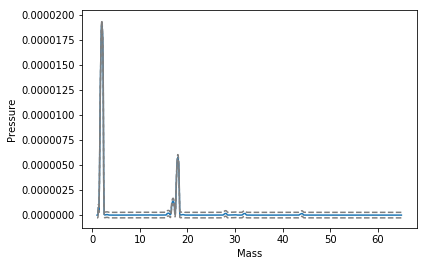

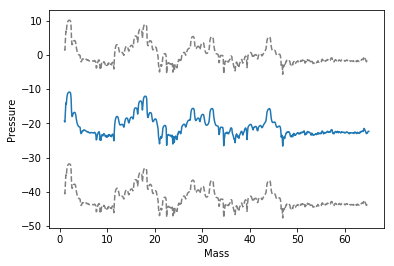

In [5]:
plt.plot(amu,mean_air)
plt.plot(amu,errpos, '--', color = 'grey')
plt.plot(amu,errneg, '--', color = 'grey')
#plt.ylim(0,0.000020)
plt.xlabel('Mass')
plt.ylabel('Pressure')
plt.show()

plt.plot(amu,lnpres)
plt.plot(amu,errposln, '--', color = 'grey')
plt.plot(amu,errnegln, '--', color = 'grey')
#plt.ylim(0,0.000020)
plt.xlabel('Mass')
plt.ylabel('Pressure')
plt.show()

In [6]:
index = []
intrange = [15.5,16.4,2.5,3.5,27.5,28.4,31.5,32.4,43.5,44.5]
for i in range(10):
    index.append(np.where(amu == intrange[i]))

print(index)

intrange = np.array([[145,154],[15,25],[265,274],[305,314],[425,435]])

peaksy = np.empty(5)
peaksx = np.empty(5)

#print(intrange[1,:])

for i in range(5):
    peaksy[i] = np.sum(mean_air[intrange[i,0]:intrange[i,1]])/(np.subtract(intrange[i,1],intrange[i,0]))
    peaksx[i] = np.sum(amu[intrange[i,0]:intrange[i,1]])/(np.subtract(intrange[i,1],intrange[i,0]))

print(peaksy)
print(peaksx)


[(array([145], dtype=int64),), (array([154], dtype=int64),), (array([15], dtype=int64),), (array([25], dtype=int64),), (array([265], dtype=int64),), (array([274], dtype=int64),), (array([305], dtype=int64),), (array([314], dtype=int64),), (array([425], dtype=int64),), (array([435], dtype=int64),)]
[1.30811481e-07 3.77133333e-08 1.12201481e-07 1.06589259e-07
 9.49200000e-08]
[15.9   2.95 27.9  31.9  43.95]


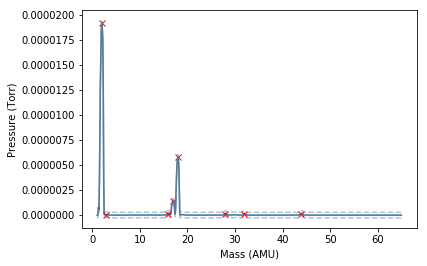

[ 2. 17. 18.] [1.92000000e-05 1.41333333e-06 5.77333333e-06]
[15.9   2.95 27.9  31.9  43.95] [1.30811481e-07 3.77133333e-08 1.12201481e-07 1.06589259e-07
 9.49200000e-08]


In [7]:
peaks, _ = find_peaks(mean_air,height = 0.000001, prominence = 0.000000000000000000001)
plt.plot(amu[peaks], mean_air[peaks], 'x', color = "r")
plt.plot(amu,mean_air)
plt.plot(amu,errpos, '--', color = 'grey',alpha = 0.5)
plt.plot(amu,errneg, '--', color = 'grey', alpha = 0.5)
plt.plot(peaksx,peaksy, 'x', color = 'r')
#plt.ylim(-0.0000005,0.0000005)
#plt.xlim(43,45)
#1.4,2.5 - peak 1
#16.5,17.4 - peak 2
#17.4,18.4 - peak 3
#minor peaks - 15.5,16.4
# - 2.5,3.5
# - 27.5,28.4
# - 31.5,32.4
# - 43.5,44.5
plt.xlabel('Mass (AMU)')
plt.ylabel('Pressure (Torr)')
plt.show()

print(amu[peaks],mean_air[peaks])
print(peaksx,peaksy)

The peaks are as follows,
in the form [amu,pressure]:

 [2,1.92000000e-05] $H_2$, 
 
[17.,1.41333333e-06] Ammonia, $OH$, 

[18.,5.77333333e-06]$H_2 O$, 

[15.9,1.30811481e-07] $CH_4$ , 

[2.95,3.77133333e-08], 

[27.9,1.12201481e-07] $N_2$, $CO$, 

[31.9,1.06589259e-07] $O_2$, 

[43.95,9.49200000e-08] $CO_2$, $N_2O$

In [149]:



percentage = np.empty(8)
percentage2 = np.empty(8)

pres = [1.92000000e-05, 1.41333333e-06, 5.77333333e-06, 1.30811481e-07, 3.77133333e-08, 1.12201481e-07, 1.06589259e-07,
 9.49200000e-08]

totpres2 = np.sum(pres)
print(totpres2)

for i in range(8):
    percentage[i] = pres[i]/totpres *100
    percentage2[i] = pres[i]/totpres2 *100
    
print(percentage)
print(np.sum(percentage))
print(percentage2)
print(np.sum(percentage2))

2.6868902214299998e-05
[10.46906371  0.77063941  3.1479893   0.07132676  0.02056371  0.0611794
  0.05811926  0.05175643]
14.650637977827166
[71.4580739   5.26010821 21.48704582  0.48685086  0.14036053  0.41758863
  0.39670121  0.35327085]
100.0


Vacuum presuure =2.6868902214299998e-05

$H_2$ = 71.46%

$OH$+Ammonia = 5.26%

$H_2O$ = 21.49%

$CH_4$ = 0.49%

Unknown = 0.14%

$N_2 + CO$ = 0.42%

$O_2$ = 0.40%

$CO_2+N_2O$ = 0.35%

## Neon Ratio

In [8]:
data_neon = np.loadtxt("neon.csv",delimiter=",", skiprows = 1)
#back = np.loadtxt("back.csv",delimiter = ",",skiprows = 1)
#print(len(back))

amu = data_neon[:,0]
neon1 = data_neon[:,1]
neon2 = data_neon[:,2]
neon3 = data_neon[:,3]

mean_neon = np.empty(len(amu))

for i in range(len(amu)):
    mean_neon[i] = np.average(data_neon[i,1:])

#print(mean_neon)    

#err = np.sqrt(np.sum(np.square(average)) - np.square(np.sum(average)))/np.sqrt(641)
err_n = np.sqrt(np.abs(np.sum(np.square(mean_neon)) - np.sum(mean_neon)**2) )/641

errpos_n = np.empty(len(amu))
errneg_n = np.empty(len(amu))

for i in range(len(amu)):
    errpos_n[i] = mean_neon[i] + err_n
    errneg_n[i] = mean_air[i] - err_n
#print(err)

#print(len(amu),len(air1),len(air2),len(air3))


#print(len(average))

#for i in range(len(amu)):
#    average[i] = air1[i],air2[i],air3[i]/3

lnpres_n = np.log(np.abs(mean_neon))
errln_n = np.sqrt(np.abs(np.sum(np.square(lnpres_n)) - np.sum(lnpres_n)**2) )/641

errposln_n = np.empty(len(amu))
errnegln_n = np.empty(len(amu))

for i in range(len(amu)):
    errposln_n[i] = lnpres_n[i] + errln_n
    errnegln_n[i] = lnpres_n[i] - errln_n


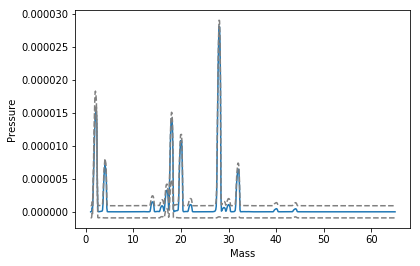

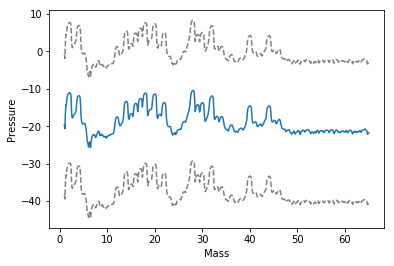

In [9]:
plt.plot(amu,mean_neon)
plt.plot(amu,errpos_n, '--', color = 'grey')
plt.plot(amu,errneg_n, '--', color = 'grey')
#plt.ylim(0,0.000020)
plt.xlabel('Mass')
plt.ylabel('Pressure')
plt.show()

plt.plot(amu,lnpres_n)
plt.plot(amu,errposln_n, '--', color = 'grey')
plt.plot(amu,errnegln_n, '--', color = 'grey')
#plt.ylim(0,0.000020)
plt.xlabel('Mass')
plt.ylabel('Pressure')
plt.show()

In [10]:
peaksx_n = [16,29,40,44]
peaksy_n = [9.15e-7,6.4e-7,4.7e-7,4.53e-7]

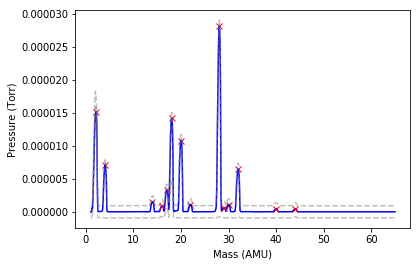

[ 2.1  4.  14.  17.  18.  20.  21.9 28.  30.  32. ] [1.87000000e-05 8.03000000e-10 9.43000000e-09 1.41333333e-06
 5.77333333e-06 7.06333333e-09 8.91333333e-10 1.65000000e-07
 2.80000000e-08 1.56666667e-07]
[16, 29, 40, 44] [9.15e-07, 6.4e-07, 4.7e-07, 4.53e-07]


In [22]:
peaks1, _ = find_peaks(mean_neon,height = 0.000001, prominence = 0.000000000000000000001)
plt.plot(amu[peaks1], mean_neon[peaks1], 'x', color = "r")
plt.plot(amu,mean_neon, color = 'b')
plt.plot(amu,errpos_n, '--', color = 'grey',alpha = 0.5)
plt.plot(amu,errneg_n, '--', color = 'grey', alpha = 0.5)
plt.plot(peaksx_n,peaksy_n, 'x', color = 'r')
#plt.ylim(-0.0000005,0.000002)
#plt.xlim(43.4,44.5)
#plt.plot(44,0.000000453,'.',color = 'black')
#[16,9.15e-7],[29,6.4e-7],[40,4.7e-7],[44,4.53e-7]
#15.5,16.4
#28.5,29.4
#39.5,40.5
#43.5,44.5
plt.xlabel('Mass (AMU)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(27,29)
#plt.ylim(2e-7,3e-5)
plt.show()



print(amu[peaks1],mean_air[peaks1])
print(peaksx_n,peaksy_n)

In [21]:
percentage2_ne = np.empty(14)

pres_ne = [1.87000000e-05, 8.03000000e-10, 9.43000000e-09, 1.41333333e-06, 5.77333333e-06, 7.06333333e-09, 8.91333333e-10, 1.65000000e-05, 2.80000000e-08, 1.56666667e-07, 9.15e-07, 6.4e-07, 4.7e-07, 4.53e-07]

totpres2_ne = np.sum(pres_ne)
print(totpres2_ne)

for i in range(14):
    percentage2_ne[i] = pres_ne[i]/totpres2_ne *100
    
print(percentage2_ne)
print(np.sum(percentage2_ne))

4.5067520993663e-05
[4.14932963e+01 1.78177096e-03 2.09241596e-02 3.13603522e+00
 1.28104080e+01 1.56727798e-02 1.97777316e-03 3.66117320e+01
 6.21289997e-02 3.47626547e-01 2.03028696e+00 1.42009142e+00
 1.04287964e+00 1.00515846e+00]
100.00000000000003


The peaks amu,pressure:

[ 2.1,  4.,  14.,  17.,  18.,  20.,  21.9, 28.,  30.,  32., 16., 29., 40., 44.]

[1.87000000e-05, 8.03000000e-10, 9.43000000e-09, 1.41333333e-06, 5.77333333e-06, 7.06333333e-09, 8.91333333e-10, 1.65000000e-07, 2.80000000e-08, 1.56666667e-07, 9.15e-07, 6.4e-07, 4.7e-07, 4.53e-07]

[2.1,1.87e-5] $H_2$ 41.15

[4,8.03e-10] $He$ 0.0018

[14,9.43e-9] 0.021

[17,1.41e-6] Ammonia 3.13

[18,5.77e-6] $H_2O$ 0.13

[20,7.06e-9] $Ne$ 0.016

[21.9,8.91e-10] $Ne$-isotope 0.002

[28,1.65e-7] $N_2$,$CO$ 36.6

[30,2.8e-8] Ethane 0.062

[32,1.57e-7] $O_2$ 0.35

[16,9.15e-7] $CH_4$ 2.03

[29,6.4e-7] 1.42

[40,4.7e-7] $Ar$ 1.04

[44,4.53e-7] $CO_2$ 1

Vacuum = 2.8732520993663e-05

##### Percentage:

$H_2$ = 6.50830465e+01 

$He$ = 2.79474259e-03 

uk14 = 3.28199534e-02 

Ammonia = 4.91893256e+00

$H_2O$ =  2.00933755e+01 

$Ne$ = 2.45830616e-02 

$Ne$-isoptope = 3.10217587e-03 

$N_2+CO_2$ = 5.74262175e-01

$Ethane$ = 9.74505509e-02 

$O_2$ = 5.45259036e-01 

$CH_4$ = 3.18454479e+00 

uk29 = 2.22744116e+00

$Ar$ =  1.63577710e+00 

$CO_2$ = 1.57661070e+00

## Pumping Rate

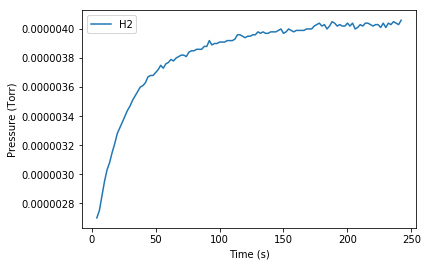

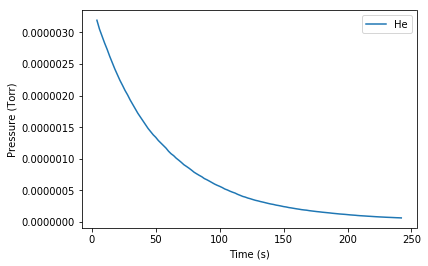

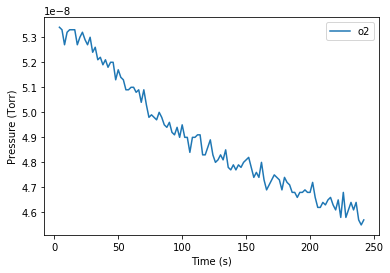

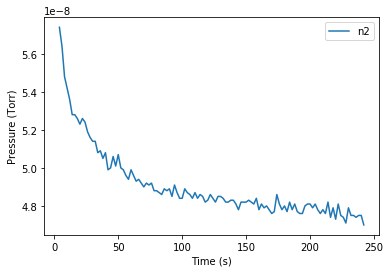

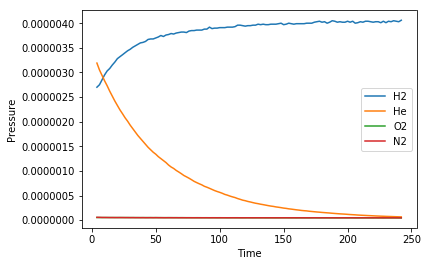

In [32]:
data_pump = np.loadtxt("pumping.csv",delimiter=",", skiprows = 1)

time = data_pump[2:,0]
h2 = data_pump[2:,1]
he = data_pump[2:,2]
o2 = data_pump[2:,3]
n2 = data_pump[2:,4]

plt.plot(time,h2, label = "H2")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,he, label = "He")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,o2, label = "o2")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,n2, label = "n2")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,h2,label = 'H2')
plt.plot(time,he,label = 'He')
plt.plot(time,o2,label = 'O2')
plt.plot(time,n2,label = 'N2')
plt.legend()
plt.ylabel('Pressure')
plt.xlabel('Time')
plt.show()

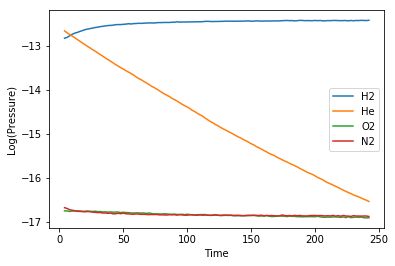

In [30]:
logh2 = np.log(h2)
loghe = np.log(he)
logo2 = np.log(o2)
logn2 = np.log(n2)

plt.plot(time,logh2,label = 'H2')
plt.plot(time,loghe,label = 'He')
plt.plot(time,logo2,label = 'O2')
plt.plot(time,logn2,label = 'N2')
plt.legend()
plt.ylabel('Log(Pressure)')
plt.xlabel('Time')
plt.show()

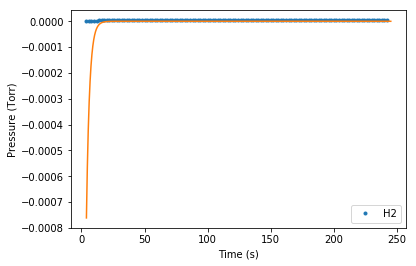

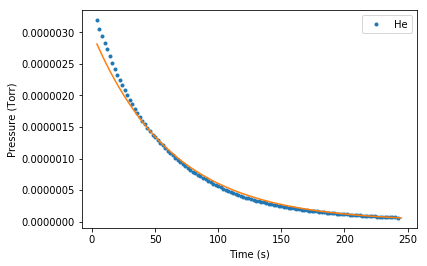

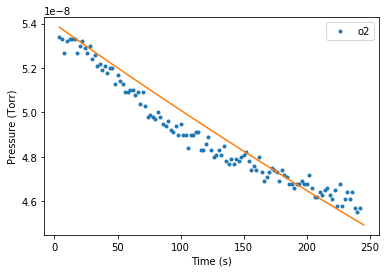

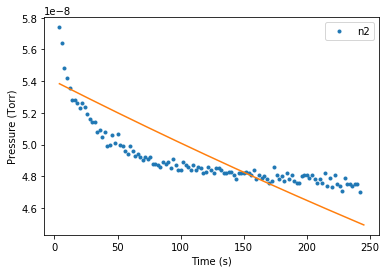

In [115]:
x1 = np.linspace(4,245,1000)
x2 = np.linspace(4,245,1000)
x3 = np.linspace(4,245,1000)
x4 = np.linspace(4,245,1000)

y1 = np.empty(len(x1))
y2 = np.empty(len(x2))
y3 = np.empty(len(x3))
y4 = np.empty(len(x4))

c1 = -3.91e-3
c2 = 3e-6
c3 = 5.4e-8
c4 = 6e-8

a1 = -4.09e-1
a2 = -0.016
a3 = -7.5e-4
a4 = -2e-9

for i in range(len(x1)):
    #y1[i] = c1*np.log(x1[i])+a1
    y1[i] = c1*np.exp(a1*x1[i])
    y2[i] = c2*np.exp(a2*x2[i])
    y3[i] = c3*np.exp(a3*x3[i])
    y4[i] = c4*np.exp(a4*x4[i])
    
plt.plot(time,h2, '.', label = "H2")
plt.plot(x1,y1)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,he, '.', label = "He")
plt.plot(x2,y2)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,o2, '.', label = "o2")
plt.plot(x3,y3)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

plt.plot(time,n2, '.', label = "n2")
plt.plot(x3,y3)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Torr)')
#plt.xlim(4)
plt.show()

[6.43579487e-11 4.55079419e-11 1.72003853e-11 1.60894872e-11]
791681.3487046281


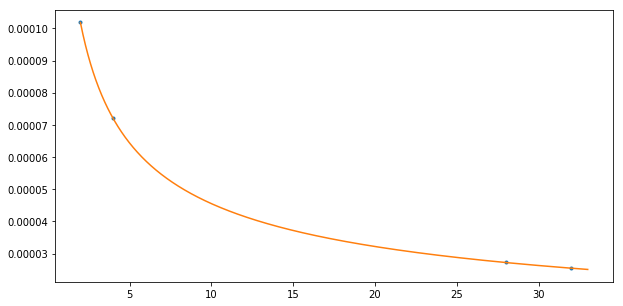

In [137]:
K = 1.38064852e-23
T = 300

def Vm(m):
    return (2*K*T/m)**(1/2)

Vm_rms = np.empty(4)
mass = np.array([2,4,28,32])

for i in range(len(Vm_rms)):
    Vm_rms[i] = Vm(mass[i])
    
print(Vm_rms)

T = 1/3600000
r = 0.035

Vb_rms = 2*np.pi*r/T
print(Vb_rms)

Vplot = np.empty(4)

for i in range(len(Vplot)):
    Vplot[i] = 2*Vb_rms * Vm_rms[i]
    
x = np.linspace(2,33,1000)
y = np.empty(len(x))

C = 1.44e-4

for i in range(len(x)):
    y[i] = C*x[i]**(-1/2)
    
plt.plot(mass,Vplot,'.')
plt.plot(x,y)
plt.show()


In [116]:
from scipy.optimize import curve_fit

[1.79472100e-02 3.34819403e-06]
[[4.42461660e-09 4.56965698e-13]
 [4.56965698e-13 8.51589034e-17]]


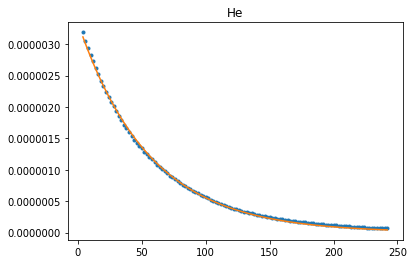

In [178]:
def yf(t,a,c):
    y = c*np.exp(-a*t)
    return y

c1,cov1 = curve_fit(yf,time,he)

print(c1)
print(cov1)

yopt = yf(time,c1[0],c1[1])

errhe = 4.42461660e-09*8.51589034e-17

plt.plot(time,he,'.')
plt.plot(time,yopt)
plt.errorbar(time,he, ecolor = "k", yerr = errhe, linestyle = 'none' )
plt.title("He")
plt.show()

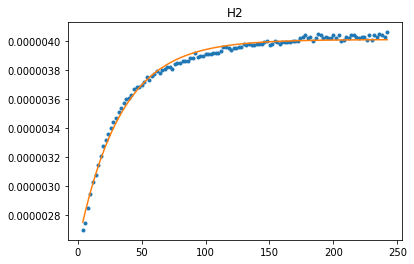

[[ 3.12176431e-07  1.82299648e-05 -5.25291221e+00 -1.23195212e-12]
 [ 1.82299649e-05  1.46275819e-01 -4.21489920e+04  1.27065875e-10]
 [-5.25291222e+00 -4.21489920e+04  1.21451210e+10 -3.66137013e-05]
 [-1.23195212e-12  1.27065876e-10 -3.66137011e-05  1.36070589e-17]]
[ 3.02315805e-02  3.47044635e-06 -8.94485877e-01  4.00967491e-06]


In [179]:
def yh(t,a,c,b,d):
    y = -c*np.exp(-a*t+b)+d
    return y


c2,cov2 = curve_fit(yh,time,h2)

yopt_h2 = yh(time,c2[0],c2[1],c2[2],c2[3])

errh2 = 1.82299649e-05*-4.21489920e+04*-3.66137011e-05*4.00967491e-06

plt.plot(time,h2,'.')
plt.plot(time,yopt_h2)
plt.errorbar(time,h2, ecolor = "k", yerr = errh2, linestyle = 'none' )
plt.title("H2")
plt.show()

print(cov2)
print(c2)

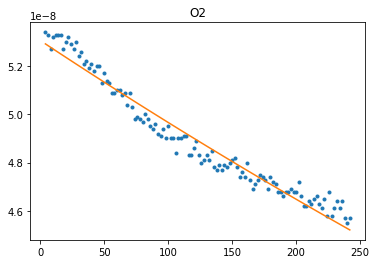

[[1.66383382e-10 1.03005071e-15]
 [1.03005071e-15 8.61369997e-21]]
[6.61209162e-04 5.30581830e-08]


In [181]:
c3,cov3 = curve_fit(yf,time,o2)

yopt_o2 = yf(time,c3[0],c3[1])

erro2 = 1.03005071e-15*5.30581830e-08

plt.plot(time,o2,'.')
plt.plot(time,yopt_o2)
plt.title("O2")
plt.errorbar(time,o2, ecolor = "k", yerr = erro2, linestyle = 'none' )
plt.show()

print(cov3)
print(c3)

[[8.43909543e-10 5.19341340e-15]
 [5.19341340e-15 4.28264518e-20]]
[4.52755061e-04 5.18564248e-08]


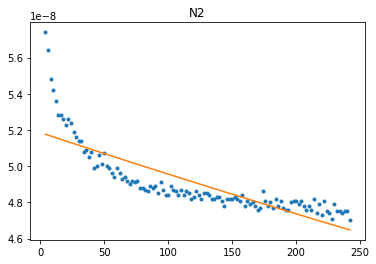

In [138]:
c4,cov4 = curve_fit(yf,time,n2)

yopt_n2 = yf(time,c4[0],c4[1])

plt.plot(time,n2,'.')
plt.plot(time,yopt_n2)
plt.title("N2")

print(cov4)
print(c4)

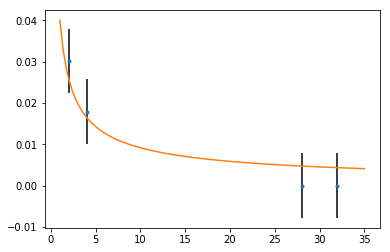

[0.99067606 0.06170059]
[[0.04914163 0.00258455]
 [0.00258455 0.00015943]]


In [177]:
def expfunc(m,a,b):
    y = b*(m**(-a))
    return y

tc = [3.02e-2,1.79e-2,1.66e-10,8.44e-10]
mass = [2,4,28,32]

mass2 = np.linspace(2,35,100)

cf,covf = curve_fit(expfunc,mass,tc)

yopt_fin = expfunc(mass2,cf[0],cf[1])

testx = np.linspace(1,35,100)
testy = np.empty(len(testx))

for i in range(len(testx)):
    testy[i] = 0.04*testx[i]**(-0.64)

errf = 0.0078
    
plt.plot(mass,tc,'.')
#plt.plot(mass2,yopt_fin)
plt.plot(testx,testy)
plt.errorbar(mass,tc, ecolor = "k", yerr = errf, linestyle = 'none' )
plt.show()

print(cf)
print(covf)

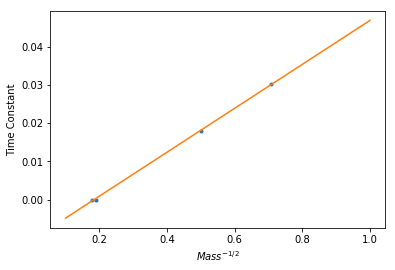

[ 0.05738853 -0.01054111]
[[ 8.55574898e-07 -3.36426105e-07]
 [-3.36426105e-07  1.74743534e-07]]


In [207]:
tc = [3.02e-2,1.79e-2,1.66e-10,8.44e-10]
mass = [2,4,28,32]

sqrt_mass = 1/np.sqrt(mass)
mass2 = np.linspace(0.1,1,100)

def linfunc(m,a,b):
    y = a*m+b
    return y

cf2,covf2 = curve_fit(linfunc,sqrt_mass,tc)

yopt_fin2 = linfunc(mass2,cf2[0],cf2[1])

errfin = (8.55574898*1.74743534)*1e-07

plt.plot(sqrt_mass,tc,'.')
plt.plot(mass2,yopt_fin2)
plt.xlabel('$Mass^{-1/2}$')
plt.ylabel('Time Constant')
plt.errorbar(sqrt_mass,tc, ecolor = "k", yerr = errfin, linestyle = 'none' )
#plt.xlim(0.0,1.1)
plt.show()

print(cf2)
print(covf2)